## Serial case (2-dimensional X-space)

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import _lib.pr_func as pr
from _lib.utility import *
%config InlineBackend.figure_format = 'retina'
sns.set()

In [7]:
# dimensions
N,M1,M2,K = 20,10,10,20
pr.set_dims([('w',N),('x1',M1),('x2',M2),('a',K)])

# environment
U = pr.func(val=gauss_utility(N,K,sigma=2),vars=['w','a'])
pw = pr.func(vars=['w'], val='unif').normalize()

# Lagrange multipliers
beta1 = 80.0
beta2 = 90.0
gamma = 100.0

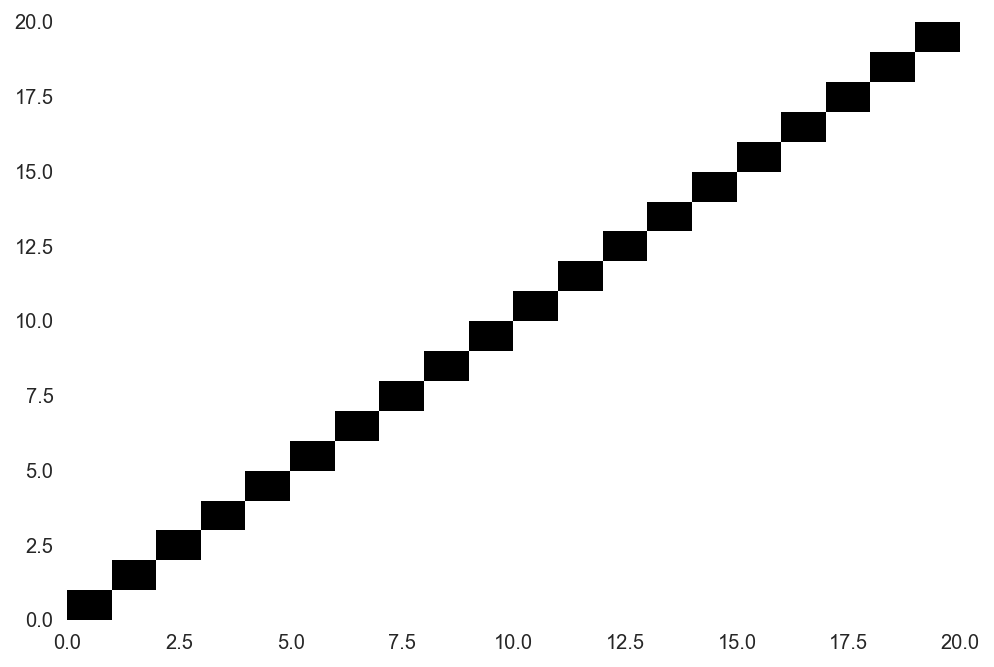

In [8]:
# initializations
px1 = pr.func(vars=['x1'], val='unif').normalize()
px2 = pr.func(vars=['x2'], val='unif').normalize()
pa = pr.func(vars=['a'], val='unif').normalize()
pagx1x2 = pr.func(vars=['a','x1','x2'], val='rnd').normalize(['a'])
F1 = pr.func('f(w,x1)', val='rnd')
pagx1x2_temp = 0

# BA iteration
for i in range(0,10000):
    px1gw = (px1*pr.exp_tr(beta1*F1)).normalize(['x1'])
    px1 = pr.sum(pw*px1gw,['w'])
    F2 = pr.sum(px1gw*pagx1x2*(U-pr.log(pagx1x2/pa)/gamma),['a','x1'])
    px2gw = (px2*pr.exp_tr(beta2*F2)).normalize(['x2'])
    px2 = pr.sum(pw*px2gw,['w'])
    pwgx1x2 = (px1gw*px2gw*pw).normalize(['w'])
    pagx1x2 = (pa*pr.exp_tr(gamma*pr.sum(pwgx1x2*U,['w']))).normalize(['a'])
    pa = pr.sum(px1gw*px2gw*pw*pagx1x2,['w','x1','x2'])
    F1 = pr.sum(px2gw*pagx1x2*(U-pr.log(pagx1x2/pa)/gamma),['a','x2'])

    if np.linalg.norm(pagx1x2.val-pagx1x2_temp)<1e-10: break
    pagx1x2_temp = pagx1x2.val

# calc and plot p(a|w)
pagw = pr.sum(pagx1x2*px1gw*px2gw,['x1','x2'])
plt.pcolor(pagw.val,cmap="Greys")
plt.show()